## Random Forest Classification

### Cody Bullock

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data import and transformation

The .csv dataset was imported into the program as a Pandas dataframe, and the irrelevant "Team" column was dropped

In [2]:
df = pd.read_csv("Data/Final files/AllFinalv4.csv")
df.drop(columns=["Team"], inplace=True)

The labels, "Wins", and features were extracted from the dataset and transformed into numpy array

In [3]:
target = df["Wins"]
data = df.iloc[:, 1:]
target = target.to_numpy()
data = data.to_numpy()

### Cross validated grid search for hyperparameters - Balanced Accuracy

The following hyperparameters were searched:  
Criterion: Function used to measure the quality of a split  
Min Samples Split: Minimum number of samples required to split internal node  
Max Features: Number of features to consider when looking for best split  
Max Depth: The maximum depth of each tree

Each model was ran with the default number of estimators (100).  

Maximum depth was allowed to go to 10 since explainability isn't a concern with random forests; random forests aren't explainable anyways.  

The ten combinations of hyperparamters with the highest average balanced accuracies were displayed.  

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, f1_score

parameters = {"criterion":("gini","entropy","log_loss"),"min_samples_split":[2,4,6,8],"max_features":("sqrt","log2"),"max_depth":[1,2,3,4,6,8,10]}

rf = RandomForestClassifier(n_estimators=100, random_state=8, class_weight="balanced")

cv = GridSearchCV(rf, parameters, cv=5, scoring="balanced_accuracy")

cv.fit(data, target)
rf_results = pd.DataFrame(cv.cv_results_)
rf_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
rf_results = rf_results[["param_criterion","param_max_depth","param_min_samples_split","param_max_features","mean_test_score","std_test_score"]]
rf_results.head(10)

,param_criterion,param_max_depth,param_min_samples_split,param_max_features,mean_test_score,std_test_score
28,gini,4,2,log2,0.251296,0.036628
24,gini,4,2,sqrt,0.251296,0.036628
0,gini,1,2,sqrt,0.248828,0.050264
2,gini,1,6,sqrt,0.248828,0.050264
3,gini,1,8,sqrt,0.248828,0.050264
4,gini,1,2,log2,0.248828,0.050264
5,gini,1,4,log2,0.248828,0.050264
6,gini,1,6,log2,0.248828,0.050264
7,gini,1,8,log2,0.248828,0.050264
1,gini,1,4,sqrt,0.248828,0.050264


The classes, "Wins", of the training data were predicted using the model with the highest average balanced accuracy from the cross-validated grid-search.  

The balanced accuracy was printed and confusion matrices were plotted to display how well the model performed on the training data as a whole.  

The top confusion matrix was normalized over the rows (recall).  
The middle confusion matrix was normalized over the columns (precision).  
The bottom confusion matrix was not normalized (absolute count).  

Balanced Accuracy Score: 0.82


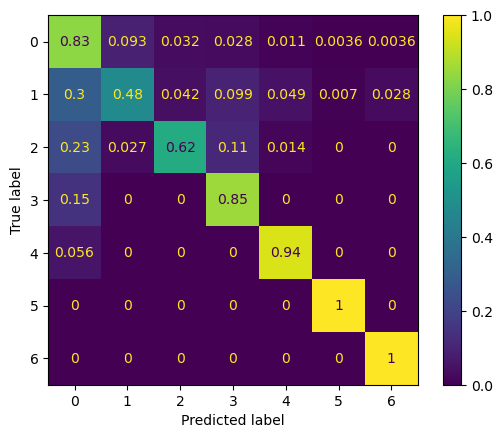

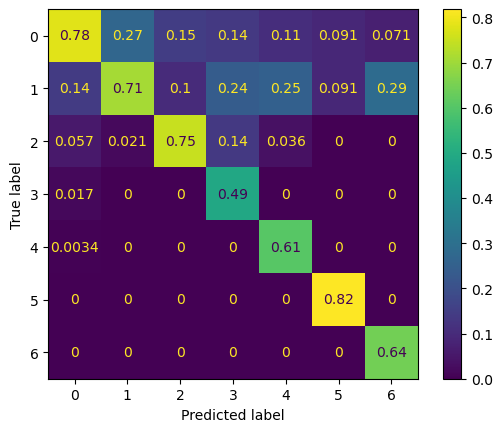

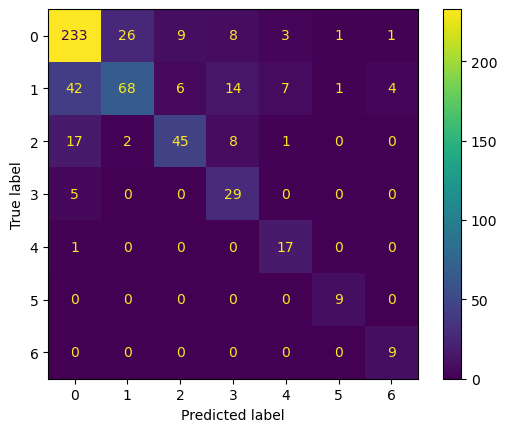

In [5]:
rf = cv.best_estimator_
rf_results = cv.best_estimator_.predict(data)
print(f"Balanced Accuracy Score: {balanced_accuracy_score(target,rf_results):.2f}")
cm = confusion_matrix(target,rf_results, normalize="true")
cm2 = confusion_matrix(target,rf_results, normalize="pred")
cm3 = confusion_matrix(target,rf_results)
disp = ConfusionMatrixDisplay(cm)
disp2 = ConfusionMatrixDisplay(cm2)
disp3 = ConfusionMatrixDisplay(cm3)
disp.plot()
disp2.plot()
disp3.plot()
plt.show()

The best model was then subject to another cross-validated grid-search in order to optimize the "n_estimators" hyperparamter.

The average balanced accuracy of the model appeared to level out with 100 "n_estimators".  

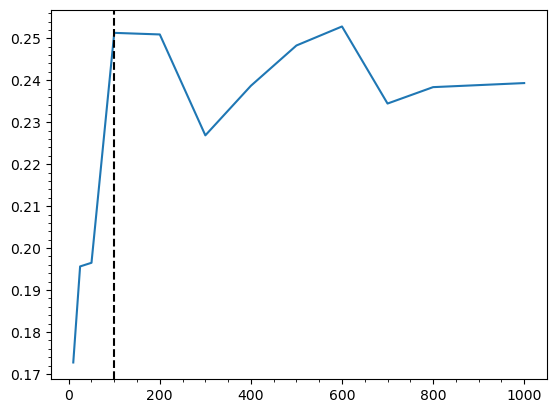

In [6]:
parameters = {"n_estimators":[10,25,50,100,200,300,400,500,600,700,800,1000]}

#rf = RandomForestClassifier(random_state=8, class_weight="balanced", criterion="gini", max_depth=4, min_samples_split=2, max_features="log2")

cv = GridSearchCV(rf, parameters, cv=5, scoring="balanced_accuracy")

cv.fit(data, target)
rf_results = pd.DataFrame(cv.cv_results_)
rf_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
rf_results = rf_results[["param_n_estimators","mean_test_score","std_test_score"]]

graph_data = rf_results.sort_values(by=["param_n_estimators"],ascending=True)

fig, ax = plt.subplots()
ax.plot(graph_data["param_n_estimators"], graph_data["mean_test_score"])
plt.minorticks_on()
ax.axvline(x=100, ls="--", color="black")
plt.show()

### Cross validated grid search for hyperparameters - F1 Score

The following hyperparameters were searched:  
Criterion: Function used to measure the quality of a split  
Min Samples Split: The minimum numbers of samples required to split an internal node  
Max Features: The maximum numbers of features to consider when evaluating a split  
Max Depth: The maximum depth of each tree  

The number of estimators of each model was held constant at the default value (100 estimators).

Performance of each combination was evaluated with "f1_weighted". The F1 Score is the mean of precision and recall. The f1 score is weighted so as to take the weighted average f1 score for each class.  

The ten combinations with the highest average f1 scores were displayed.  

In [7]:
parameters = {"criterion":("gini","entropy","log_loss"),"min_samples_split":[2,4,6,8],"max_features":("sqrt","log2"),"max_depth":[1,2,3,4,6,8,10]}

rf2 = RandomForestClassifier(n_estimators=100, random_state=8, class_weight="balanced")

cv = GridSearchCV(rf2, parameters, cv=5, scoring="f1_weighted")

cv.fit(data, target)
rf_results = pd.DataFrame(cv.cv_results_)
rf_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
rf_results = rf_results[["param_criterion","param_max_depth","param_min_samples_split","param_max_features","mean_test_score","std_test_score"]]
rf_results.head(10)

,param_criterion,param_max_depth,param_min_samples_split,param_max_features,mean_test_score,std_test_score
34,gini,6,6,sqrt,0.481369,0.034571
38,gini,6,6,log2,0.481369,0.034571
42,gini,8,6,sqrt,0.465247,0.020495
46,gini,8,6,log2,0.465247,0.020495
92,entropy,6,2,log2,0.462672,0.031832
88,entropy,6,2,sqrt,0.462672,0.031832
144,log_loss,6,2,sqrt,0.462672,0.031832
148,log_loss,6,2,log2,0.462672,0.031832
146,log_loss,6,6,sqrt,0.461522,0.034940
150,log_loss,6,6,log2,0.461522,0.034940


The classes, "Wins", of the training data were predicted using the model with the highest average f1 score from the cross-validated grid-search.  

The balanced accuracy was printed and confusion matrices were plotted to display how well the model performed on the training data as a whole.  

The top confusion matrix was normalized over the rows (recall).  
The middle confusion matrix was normalized over the columns (precision).  
The bottom confusion matrix was not normalized (absolute count).  ount).

Balanced Accuracy Score: 0.92


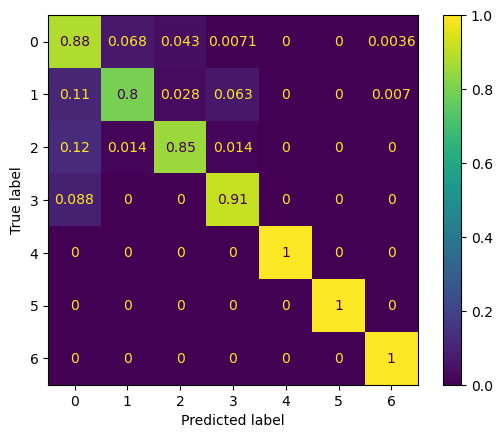

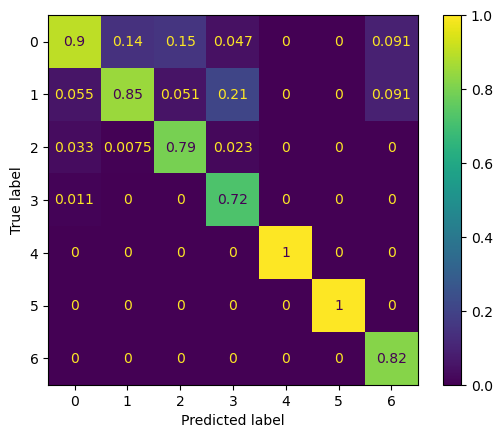

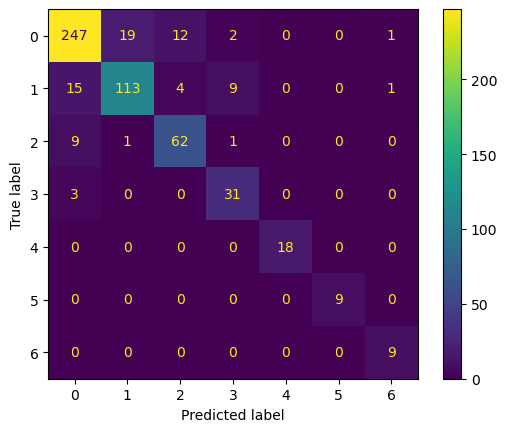

In [8]:
from sklearn.metrics import precision_recall_fscore_support

rf2 = cv.best_estimator_
rf_results = cv.best_estimator_.predict(data)
print(f"Balanced Accuracy Score: {balanced_accuracy_score(target,rf_results):.2f}")
cm = confusion_matrix(target,rf_results, normalize="true")
cm2 = confusion_matrix(target,rf_results, normalize="pred")
cm3 = confusion_matrix(target,rf_results)
disp = ConfusionMatrixDisplay(cm)
disp2 = ConfusionMatrixDisplay(cm2)
disp3 = ConfusionMatrixDisplay(cm3)
disp.plot()
disp2.plot()
disp3.plot()
plt.show()

The best model was then subject to two more parallel cross-validated grid-searches in order to optimize the "n_estimators" hyperparamter.  

Both the average f1 score and average balanced accuracy appeared to level off beginning at 100 estimators.

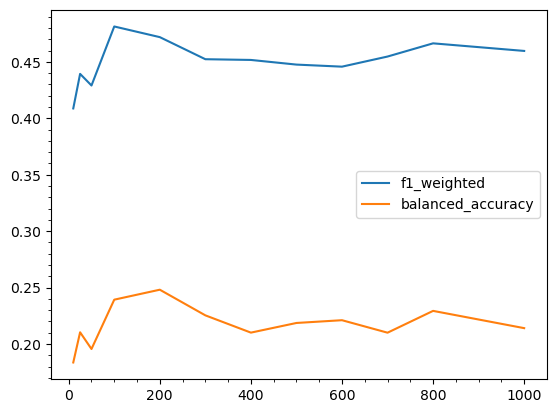

In [9]:
parameters = {"n_estimators":[10,25,50,100,200,300,400,500,600,700,800,1000]}

#rf = RandomForestClassifier(random_state=8, class_weight="balanced", criterion="gini", max_depth=6, min_samples_split=6, max_features="sqrt")

cv = GridSearchCV(rf2, parameters, cv=5, scoring="f1_weighted")
cv2 = GridSearchCV(rf2, parameters, cv=5, scoring="balanced_accuracy")

cv.fit(data, target)
cv2.fit(data,target)
rf_results = pd.DataFrame(cv.cv_results_)
rf_results.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
rf_results = rf_results[["param_n_estimators","mean_test_score","std_test_score"]]
rf_results2 = pd.DataFrame(cv2.cv_results_)
rf_results2.sort_values(by=["mean_test_score"],inplace=True,ascending=False)
rf_results2 = rf_results2[["param_n_estimators","mean_test_score","std_test_score"]]

graph_data = rf_results.sort_values(by=["param_n_estimators"],ascending=True)
graph_data2 = rf_results2.sort_values(by=["param_n_estimators"],ascending=True)

fig, ax = plt.subplots()
line1 = ax.plot(graph_data["param_n_estimators"], graph_data["mean_test_score"], label = "f1_weighted")
line2 = ax.plot(graph_data2["param_n_estimators"], graph_data2["mean_test_score"], label = "balanced_accuracy")
plt.minorticks_on()
ax.legend()
plt.show()

### Model Persistence

The trees were saved in order to be used with the test set.  

In [10]:
from joblib import dump,load
dump(rf, "RFBalancedAcc.joblib")
dump(rf2, "RFF1Weighted.joblib")

['RFF1Weighted.joblib']